In [ ]:
<br>
<br>
<center>
    
# 2016年美国总统大选数据分析

</center>
<br>

![](img/trump.jpeg)

### 对2016美国大选民意调查数据进行统计分析
题目来源:[2016美国大选](https://www.kaggle.com/fivethirtyeight/2016-election-polls)

### 我们在本次实践中，将会使用到的知识点如下：
* 1. python的基本语法
* 2. numpy的多维数组
* 3. pandas的DataFrame结构
* 4. matplotlib的scatter,bar图表


## 1、分析问题
#### 按照月份求两位候选人民调数据的和，用折线图反映两位候选人民调的走势

* 对日期数据进行处理： mm/dd/yyyy -> yyyy-mm需要使用datetime模块
* 对数据处理：判断候选人数据的有效性： -> 有空值 先做处理、数据格式做转换：由str类型转换为float浮点型并求和。
* 数据分析可视化呈现：绘制折线图

## 2、分析数据
#### 从Kaggle官网下载presidential_polls.csv，这个数据集是人民的选举数据，在data目录下已经下载好数据
加载csv数据，获取其中一些列的数据：民调结束的时间（enddate），希拉里的民调（adjpoll_clinton），特朗普民调数据（adjpoll_trump）

In [33]:
#数据分析
import pandas as pd 
#科学计算
import numpy as np 
#读取训练数据
data_poll = pd.read_csv('./data/presidential_polls.csv',encoding='UTF-8')
#查看训练数据
data_train.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


#### 我们看到，该数据集包含了2015年11月至2016年11月期间对于2016美国大选的选票数据，共27列数据。包括按州，日期，民意调查和民意调查评分得出的原始和加权民意调查结果的数据。


In [25]:
# 数据统计
data_poll.describe()

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id
count,10236.0,10233.000000,10236.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000,6480.000000,51.000000,10236.000000,10236.000000
mean,2016.0,1115.791557,0.221769,41.717579,39.227002,7.713394,23.235294,43.024900,42.048617,4.804207,24.877707,45317.883060,70588.462485
std,0.0,2159.610968,0.535846,7.482747,7.648679,2.948387,7.278979,6.732445,6.707382,2.492364,5.710113,2871.251404,4677.283414
min,2016.0,35.000000,0.000000,11.040000,4.000000,0.000000,9.000000,16.419590,3.233949,-3.372429,13.973230,35362.000000,47244.000000
25%,2016.0,440.000000,0.000444,38.000000,34.877500,6.000000,20.000000,40.151210,37.973375,3.321973,21.407520,44850.750000,68747.000000
50%,2016.0,772.000000,0.008206,43.000000,39.000000,7.250000,26.000000,43.732560,42.034530,4.502154,26.093830,45925.500000,71773.500000
75%,2016.0,1225.000000,0.101939,46.000000,44.000000,9.000000,29.000000,46.507035,45.373782,5.855422,29.672160,47008.250000,73497.750000
max,2016.0,40816.000000,7.591351,88.000000,68.000000,25.000000,31.000000,86.699620,71.864600,19.277800,31.982120,48000.000000,75067.000000


In [35]:
import datetime as dt
#将日期数据进行处理   mm/dd/yyyy -> yyyy-mm 
dates = [dt.datetime.strptime(date,'%m/%d/%Y') for date in data_poll.enddate.values]
update_dates = [i.strftime('%Y-%m') for i in dates]
data_poll.enddate = update_dates

# #先把两个候选人的数据提取出来(有空值，把空值置0)
# #得到两组浮点类型数据，方便计算求和
pd.notnull(data_poll["adjpoll_clinton"])

# 缺失值填充
data_poll.adjpoll_trump.replace(to_replace='', value=0)
data_poll.adjpoll_clinton.replace(to_replace='', value=0)
# 类型转换
data_poll.adjpoll_clinton.astype(np.float64)
data_poll.adjpoll_trump.astype(np.float64)


0        40.86509
1        44.72984
2        40.72604
3        45.30585
4        42.20888
           ...   
10231    54.76821
10232    39.41588
10233    39.97518
10234    46.66175
10235    44.65947
Name: adjpoll_trump, Length: 10236, dtype: float64

In [36]:
# 特朗普每个月的民调数据和如下
sum_data_trump = data_poll['adjpoll_trump'].groupby(data_poll['enddate']).sum()
print(sum_data_trump)

enddate
2015-11      1937.329010
2015-12      4088.921900
2016-01      6248.367790
2016-02      7657.118140
2016-03     10013.503040
2016-04      9838.136360
2016-05     12180.809890
2016-06     18158.140370
2016-07     22697.655450
2016-08     66327.648580
2016-09    106092.927230
2016-10    165169.090509
Name: adjpoll_trump, dtype: float64


In [38]:
# 希拉里每个月的民调数据和如下
sum_data_clinton = data_poll['adjpoll_clinton'].groupby(data_poll['enddate']).sum()
print(sum_data_clinton)
type(sum_data_clinton)

enddate
2015-11      1916.69806
2015-12      4637.25688
2016-01      6707.36657
2016-02      8081.37200
2016-03     11279.98650
2016-04     11870.62212
2016-05     12738.31554
2016-06     20255.68739
2016-07     23645.84188
2016-08     68610.18878
2016-09    103729.44540
2016-10    166930.09514
Name: adjpoll_clinton, dtype: float64


pandas.core.series.Series

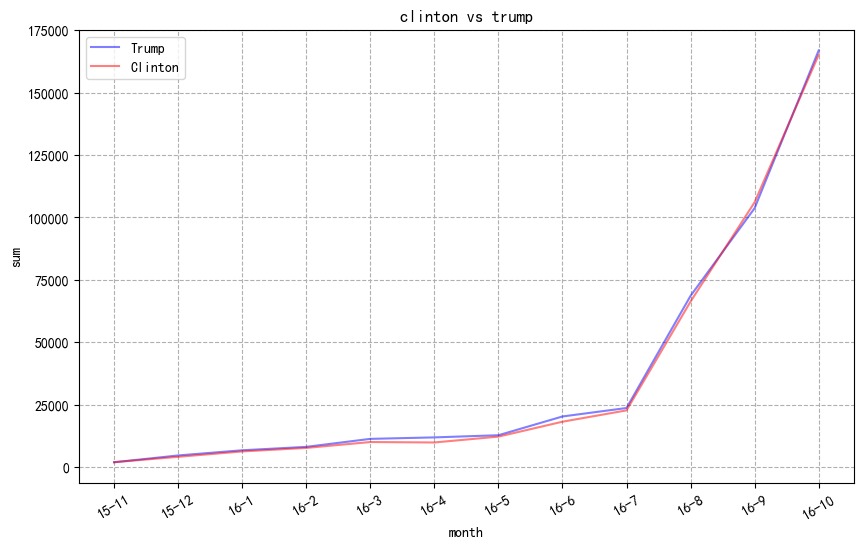

In [71]:
import matplotlib.pyplot as plt
#折线图反映两位候选人民调的走势

# 创建画布
plt.figure(figsize=(10,6), dpi=100)

# x轴数据
months = ['15-11','15-12','16-1','16-2','16-3','16-4','16-5','16-6','16-7','16-8','16-9','16-10']

plt.plot(months,sum_data_clinton.values,'b',alpha=0.5,label='Trump')
plt.plot(months,sum_data_trump.values,'r',alpha=0.5,label='Clinton')

plt.xlabel('month')
plt.ylabel('sum')
plt.title('clinton vs trump')

# 设置中文字体（可选）
# plt.rcParams['font.sans-serif'] = ['SimHei']

# 设置背景网格（虚线）
plt.xticks(rotation=30)
plt.grid(linestyle='--') 
# 自动在最合适的位置
plt.legend(loc='best') # 自动在最合适的位置
plt.show()


#### 我们在图上可以看出来，
* trump和cliton的选票走势一致


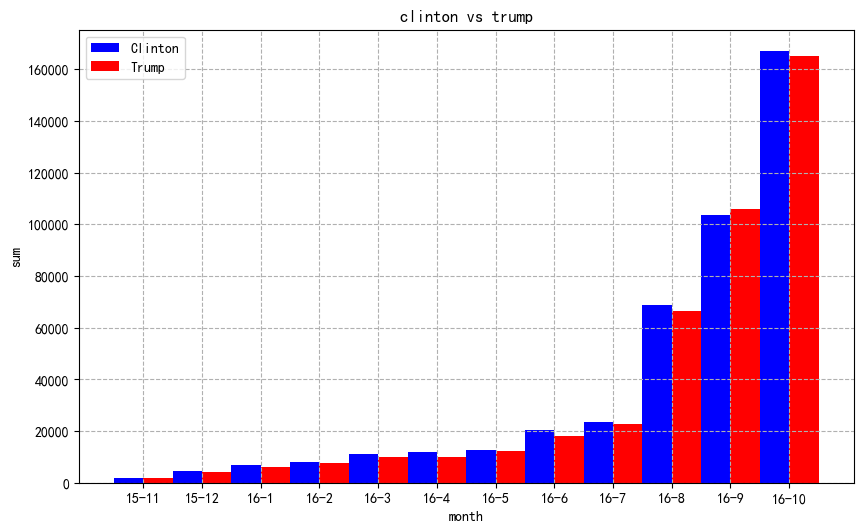

In [77]:
import matplotlib.pyplot as plt
# 柱状图反映两位候选人民调的对比

# 创建画布
plt.figure(figsize=(10,6), dpi=100)

# x轴数据
x = np.arange(12)
months = ['15-11','15-12','16-1','16-2','16-3','16-4','16-5','16-6','16-7','16-8','16-9','16-10']
bar_width = 0.5

plt.bar(x,sum_data_clinton.values,width=bar_width,label='Clinton',color='b')
plt.bar(x + bar_width,sum_data_trump.values,width=bar_width,label='Trump',color='r')

plt.xlabel('month')
plt.ylabel('sum')
plt.title('clinton vs trump')

plt.rcParams['font.sans-serif'] = ['SimHei']

# 设置背景网格（虚线）
plt.xticks(x + bar_width/2,months)
plt.grid(linestyle='--') 
# 自动在最合适的位置
plt.legend(loc='best') # 自动在最合适的位置
plt.show()

In [ ]:
#### 我们在图上可以看出来，
* trump和cliton的选票十分接近

In [76]:
# 我们从累计票数来对比
print("clinton:",data_poll['adjpoll_clinton'].sum())
print("trump:",data_poll['adjpoll_trump'].sum())

clinton: 440402.87625999993
trump: 430409.648269
